In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
df=pd.read_csv("Marmara1990_Tr100Day.csv")

In [ ]:
Marmara1990_Tr100Day= df
Marmara1990_Tr100Day.head()


,Time,Max_Magnitude,Mean_Magnitude,Std_Magnitude,Mean_Depth,Earthquake_Frequency,Earthquake_Numbers,Mean_Energy,Std_Energy,Mean_b_value,Std_b_value,b_value_ratio,Total_Energy,Energy_Density,Elapsed_Time,Future_Max_Magnitude
0,1990-04-11 20:34:55,3.8,2.805208,0.295000,13.312500,0.96,96,220.382917,507.390159,1.079063,0.204332,0.189361,21156.76,220.382917,12.546389,4.3
1,1990-04-14 05:05:04,3.8,2.805319,0.297071,13.478723,0.94,94,222.661170,512.539659,1.060638,0.184722,0.174161,20930.15,222.661170,56.502500,4.3
2,1990-04-17 20:52:41,3.8,2.808421,0.297029,13.400000,0.95,95,223.284105,509.842249,1.058842,0.184569,0.174312,21211.99,223.284105,87.793611,4.3
3,1990-04-18 10:18:02,3.8,2.807292,0.295669,13.354167,0.96,96,221.695625,507.390531,1.056875,0.184604,0.174669,21282.78,221.695625,13.422500,4.3
4,1990-04-19 08:40:23,3.8,2.803093,0.297018,13.412371,0.97,97,219.669072,505.135429,1.054845,0.184725,0.175120,21307.90,219.669072,22.372500,4.3


In [ ]:
Marmara1990_Tr100Day.shape

(23093, 16)

In [ ]:
Marmara1990_Tr100Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  23093 non-null  object 
 1   Max_Magnitude         23093 non-null  float64
 2   Mean_Magnitude        23093 non-null  float64
 3   Std_Magnitude         23093 non-null  float64
 4   Mean_Depth            23093 non-null  float64
 5   Earthquake_Frequency  23093 non-null  float64
 6   Earthquake_Numbers    23093 non-null  int64  
 7   Mean_Energy           23093 non-null  float64
 8   Std_Energy            23093 non-null  float64
 9   Mean_b_value          23093 non-null  float64
 10  Std_b_value           23093 non-null  float64
 11  b_value_ratio         23093 non-null  float64
 12  Total_Energy          23093 non-null  float64
 13  Energy_Density        23093 non-null  float64
 14  Elapsed_Time          23093 non-null  float64
 15  Future_Max_Magnitud

In [ ]:
X = Marmara1990_Tr100Day.iloc[:, 1:14].values

y = Marmara1990_Tr100Day.iloc[:,15].values

In [ ]:
X

array([[3.80000000e+00, 2.80520833e+00, 2.95000372e-01, ...,
        1.89361074e-01, 2.11567600e+04, 2.20382917e+02],
       [3.80000000e+00, 2.80531915e+00, 2.97070652e-01, ...,
        1.74161040e-01, 2.09301500e+04, 2.22661170e+02],
       [3.80000000e+00, 2.80842105e+00, 2.97028961e-01, ...,
        1.74311982e-01, 2.12119900e+04, 2.23284105e+02],
       ...,
       [4.00000000e+00, 2.40583333e+00, 4.37966238e-01, ...,
        9.61024515e-02, 2.10538400e+04, 1.75448667e+02],
       [4.00000000e+00, 2.40583333e+00, 4.37966238e-01, ...,
        9.64805372e-02, 2.10538400e+04, 1.75448667e+02],
       [4.00000000e+00, 2.40420168e+00, 4.35966675e-01, ...,
        9.67914233e-02, 2.09240600e+04, 1.75832437e+02]])

In [ ]:
y

array([4.3, 4.3, 4.3, ..., 4.3, 4.3, 4.3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create an instance of StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.66352616, -0.52375765, -0.34977986, ..., -0.5068393 ,
        -0.24334173, -0.22333894],
       [ 0.25655624,  0.84521341, -0.26932271, ..., -0.33241865,
        -0.24528703, -0.224684  ],
       [ 0.15481376, -1.28556043,  0.7361861 , ...,  0.23050948,
        -0.24551785, -0.22542147],
       ...,
       [ 0.35829872, -1.52719824,  1.25490423, ..., -0.56007291,
        -0.24467867, -0.22258233],
       [-0.96435351,  0.37702804, -1.28596358, ..., -0.97247181,
        -0.24599267, -0.22661636],
       [ 0.4600412 ,  0.32646442, -0.01782247, ...,  0.56282773,
        -0.2441744 , -0.22371518]])

In [ ]:
X_test

array([[-0.65912608,  0.33986603, -0.73756315, ..., -1.33888583,
        -0.24594793, -0.22649781],
       [ 0.56178368, -0.86231275,  1.67286308, ..., -0.31329639,
        -0.24413039, -0.22102568],
       [ 1.17223856, -1.07624926,  1.8031267 , ...,  1.16815711,
        -0.23249891, -0.1883792 ],
       ...,
       [ 0.66352616,  0.92279176, -0.28654922, ..., -0.14404294,
        -0.24367608, -0.21649072],
       [-0.86261103, -1.27258764,  0.62091855, ..., -0.42475981,
        -0.2459552 , -0.22659147],
       [ 2.29140584, -0.20879612,  2.43962141, ...,  2.59543476,
         0.33170115,  0.78018769]])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
input_layer = Input(shape=(X.shape[1],))

# 1st Block
x = Dense(512, activation='relu')(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# 2nd Block
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# 3rd Block
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# 4th Block
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# 5th Block
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# 6th Block
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# 7th Block
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
output = Dense(1)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

In [ ]:
my_model = model

In [ ]:
my_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 517,249 (1.97 MB)

 Trainable params: 513,729 (1.96 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [ ]:
history = model.fit(X_train, y_train, batch_size= 64, epochs= 300, verbose=1, validation_split=0.2)

Epoch 1/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 17.5647 - mean_squared_error: 17.5647 - val_loss: 5.4109 - val_mean_squared_error: 5.4109
Epoch 2/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.9094 - mean_squared_error: 3.9094 - val_loss: 0.4731 - val_mean_squared_error: 0.4731
Epoch 3/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5634 - mean_squared_error: 1.5634 - val_loss: 0.3736 - val_mean_squared_error: 0.3736
Epoch 4/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2494 - mean_squared_error: 1.2494 - val_loss: 0.3137 - val_mean_squared_error: 0.3137
Epoch 5/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0593 - mean_squared_error: 1.0593 - val_loss: 0.2951 - val_mean_squared_error: 0.2951
Epoch 6/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8471 - mean_squared_error: 0.8471 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 7/300
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7636 - mean_squared_error: 0.7636 - val

<Figure size 10000x2500 with 0 Axes>

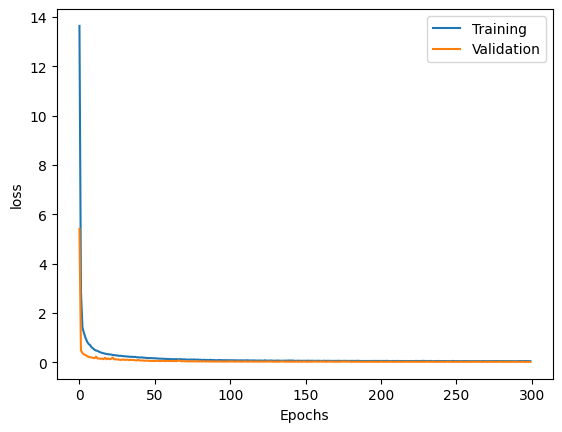

<Figure size 10000x2500 with 0 Axes>

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])
plt.figure(figsize = (20,5), dpi = (500))

In [ ]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.around(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted labels:  [[4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]]
Actual labels :  [3.7 4.9 4.2 4.2 3.6 4.4 3.6 4.3 4.5 3.8]


In [ ]:
from sklearn.metrics import r2_score
y_true = np.around(predictions)
y_pred = y_test
r2_score(y_true, y_pred)

0.8611949680807351

<Figure size 12500x2500 with 0 Axes>

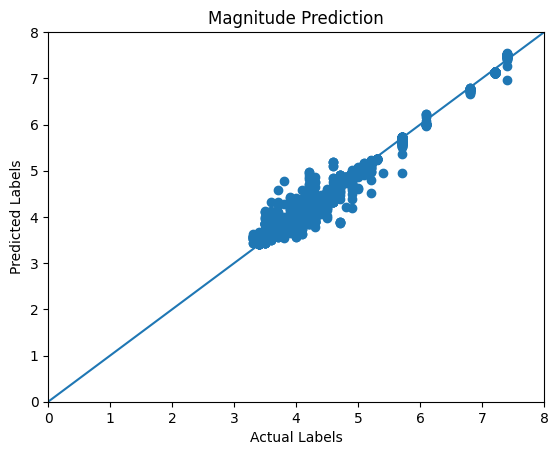

<Figure size 12500x2500 with 0 Axes>

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Magnitude Prediction')
lims = [0, 8]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.figure(figsize = (25,5), dpi = (500))

In [ ]:
my_model = model

In [ ]:
model.save('my_model.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Modeli Google Drive'a kaydedin
save_path = '/content/drive/My Drive/saved_models/my_model.keras'
model.save(save_path)


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Google Drive'dan modeli yükleyin
load_path = '/content/drive/My Drive/saved_models/my_model.keras'
loaded_model = load_model(load_path)

# Modelin özetini görüntüleyin
loaded_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,544,709 (5.89 MB)

 Trainable params: 513,729 (1.96 MB)

 Non-trainable params: 3,520 (13.75 KB)

 Optimizer params: 1,027,460 (3.92 MB)

In [ ]:
import tensorflow as tf
import pandas as pd
raw_dataset=pd.read_csv("Marmara2024_Pr100Day.csv",sep=",")

In [ ]:
Marmara2024_Pr100Day = raw_dataset.copy()
Marmara2024_Pr100Day.head()

,Time,Max_Magnitude,Mean_Magnitude,Std_Magnitude,Mean_Depth,Earthquake_Frequency,Earthquake_Numbers,Mean_Energy,Std_Energy,Mean_b_value,Std_b_value,b_value_ratio,Total_Energy,Energy_Density,Elapsed_Time
0,7/16/2024 5:54,4.4,2.353030,0.475627,9.125152,0.66,66,501.867576,3113.455681,1.780303,0.136156,0.076479,33123.26,501.867576,63.033333
1,7/18/2024 15:41,4.4,2.359375,0.484266,9.276406,0.64,64,517.628125,3161.180932,1.761406,0.108640,0.061678,33128.20,517.628125,57.783333
2,7/18/2024 17:29,4.4,2.370769,0.489171,9.340000,0.65,65,514.000615,3136.523326,1.760462,0.108057,0.061380,33410.04,514.000615,1.800000
3,7/18/2024 19:01,4.4,2.380303,0.491534,9.304697,0.66,66,509.235909,3112.543412,1.759545,0.107481,0.061084,33609.57,509.235909,1.533333
4,7/19/2024 19:26,4.4,2.384848,0.489346,9.273030,0.66,66,509.409697,3112.515220,1.758485,0.107320,0.061030,33621.04,509.409697,24.416667


In [ ]:
Marmara2024_Pr100Day.shape

(171, 15)

In [ ]:
X_new =Marmara2024_Pr100Day.iloc[:, 1:14].values

In [ ]:
X_new

array([[    4.4       ,     2.3530303 ,     0.47562742, ...,
            0.07647893, 33123.26      ,   501.8675758 ],
       [    4.4       ,     2.359375  ,     0.48426634, ...,
            0.06167826, 33128.2       ,   517.628125  ],
       [    4.4       ,     2.37076923,     0.4891712 , ...,
            0.06138001, 33410.04      ,   514.0006154 ],
       ...,
       [    4.        ,     2.40746269,     0.42863894, ...,
            0.07778988, 12009.77      ,   179.2502985 ],
       [    4.        ,     2.40294118,     0.42705887, ...,
            0.07808877, 12018.68      ,   176.7452941 ],
       [    4.        ,     2.40441176,     0.42722074, ...,
            0.07804831, 12029.04      ,   176.8976471 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler to your data
sc.fit(X_new)

# Transform your data
X_new = sc.transform(X_new)


In [ ]:
X_new

array([[ 0.65877914, -1.43993652,  0.25779912, ...,  2.59517519,
         0.34626289,  0.33864447],
       [ 0.65877914, -1.28371109,  0.37635949, ...,  1.37172462,
         0.3465995 ,  0.41233554],
       [ 0.65877914, -1.00315102,  0.44367368, ...,  1.34707039,
         0.36580389,  0.39537452],
       ...,
       [-0.7582175 , -0.09964832, -0.38707   , ...,  2.7035408 ,
        -1.09239633, -1.16980637],
       [-0.7582175 , -0.21098145, -0.40875487, ...,  2.72824718,
        -1.09178921, -1.18151894],
       [-0.7582175 , -0.17477115, -0.40653342, ...,  2.7249026 ,
        -1.09108328, -1.18080658]])

In [ ]:
print(model.predict(X_new))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[4.5607944]
 [4.316457 ]
 [4.095894 ]
 [3.9609847]
 [3.9301589]
 [3.9466407]
 [3.9898808]
 [4.159485 ]
 [4.0466714]
 [3.900968 ]
 [3.9037971]
 [3.9228315]
 [4.02618  ]
 [4.0160074]
 [3.967463 ]
 [3.996729 ]
 [5.6291203]
 [4.4818816]
 [4.4871473]
 [4.49557  ]
 [4.5003138]
 [4.4825225]
 [4.4885697]
 [4.494333 ]
 [4.4999256]
 [4.552652 ]
 [4.616575 ]
 [4.49326  ]
 [4.582175 ]
 [4.7234   ]
 [4.6657753]
 [4.658105 ]
 [4.6733317]
 [4.6403837]
 [4.6418295]
 [4.53791  ]
 [4.4484   ]
 [4.59144  ]
 [4.495821 ]
 [4.2745223]
 [3.6718302]
 [3.653993 ]
 [4.216221 ]
 [4.2421017]
 [3.613785 ]
 [3.6629238]
 [3.705071 ]
 [3.7767055]
 [3.9333444]
 [3.67176  ]
 [4.02744  ]
 [3.7248816]
 [4.006615 ]
 [3.7141716]
 [3.7410505]
 [3.7291322]
 [3.7287998]
 [3.720284 ]
 [3.783087 ]
 [3.971209 ]
 [3.7901442]
 [4.10395  ]
 [4.66592  ]
 [4.7041154]
 [4.7087665]
 [4.7919893]
 [4.9016066]
 [5.052389 ]
 [5.0674715]
 [4.670941 ]
 [4.7370467]
 [4.789631 ]
 [4.8203754]
 [4.739784 ]
